In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Quick intro for seaborn.violinplot and other resources

Load data
- from excel data: use pd.read_excel (from pandas) [demo](https://datatofish.com/read_excel/)
- from .mat data: use loadmat (from scipy package) [demo](https://towardsdatascience.com/how-to-load-matlab-mat-files-in-python-1f200e1287b5)

Other useful references
- [accepted data structures in seaborn](https://seaborn.pydata.org/tutorial/data_structure.html)
- [pandas cheatsheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034352&utm_targetid=dsa-473406587915&utm_loc_interest_ms=&utm_loc_physical_ms=1001118&gclid=CjwKCAjw4871BRAjEiwAbxXi2wSc4Yah46O_E0fKWU0etWk2iXWoG0nx0gFkMdFIuV93HcxyS9DqfRoCCE4QAvD_BwE)
- [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [point overlay with pointplot](https://stackoverflow.com/questions/27322650/how-to-use-seaborn-pointplot-and-violinplot-in-the-same-figure-change-xticks-a)
- [SeabornFig2Grid](https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot): custom helper class for subplot alignment

## Feature values - violinplots for individual stattests
cfr violinplots generated earlier in matlab, but add indicator for hypothesis rejections

In [2]:
root = r'C:\Users\jefma\Documents\1_KUL\BME3\dev\qssr_dvc\data\combi'
rawdir = root + r'\ftr_data_raw_orm.xlsx'
zscdir = root + r'\ftr_data_zsc_orm.xlsx'

df_raw = pd.read_excel(rawdir)
df_zsc = pd.read_excel(zscdir)

In [6]:
df_raw

,filename,session,condition,SubjID,spray,anxiety,security,avoidance,CDA_Phasic_SC_Power,CDA_Diff2_SC_Power,...,RSPC_Vt_MN,RSPC_Vt_SD,RSPC_Vt_MAD,RSPC_Vt_CV,RSPC_Vt_AR,RSPC_MV_MN,RSPC_MV_SD,RSPC_MV_MAD,RSPC_MV_CV,RSPC_MV_AR
0,PP01_RS_POST,POST,RS,1,placebo,4.857143,6.000000,3.857143,0.012107,2.500729e-06,...,2.830272,1.211496,0.942570,0.428049,0.365002,38.590231,7.682759,5.582664,0.199086,0.334679
1,PP01_RS_PRE,PRE,RS,1,placebo,4.857143,6.000000,3.857143,0.050960,NaN,...,3.054503,0.926942,0.709762,0.303467,0.378615,36.679434,8.794366,6.597718,0.239763,0.046631
2,PP02_EYE_POST,POST,EYE,2,placebo,4.857143,6.000000,2.142857,NaN,1.962629e-06,...,NaN,3.803762,1.936765,NaN,0.382321,34.480838,39.889555,21.848281,1.156862,0.162786
3,PP02_EYE_PRE,PRE,EYE,2,placebo,4.857143,6.000000,2.142857,NaN,2.706538e-06,...,3.022520,1.245617,0.657101,0.412112,0.019227,49.056465,17.582807,10.034829,0.358420,0.083798
4,PP02_RS_POST,POST,RS,2,placebo,4.857143,6.000000,2.142857,NaN,1.308085e-06,...,2.817164,3.082440,1.348504,1.094164,0.100015,42.779923,35.804338,17.293545,0.836943,0.070022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,PP55_RS_PRE,PRE,RS,55,placebo,3.285714,5.714286,1.428571,0.031920,NaN,...,2.810490,1.689337,1.101784,0.601083,0.445253,30.986395,11.841292,7.957037,0.382145,0.125483
208,PP56_EYE_POST,POST,EYE,56,oxytocin,3.428571,6.571429,1.714286,0.093203,8.950314e-07,...,3.150366,0.432627,0.333605,0.137326,0.334694,51.978209,9.081995,7.318547,0.174727,0.382825
209,PP56_EYE_PRE1,PRE,EYE,56,oxytocin,3.428571,6.571429,1.714286,0.203352,1.408535e-06,...,3.109081,0.509350,0.263273,0.163826,-0.023330,52.541121,9.011665,6.395069,0.171516,0.184175
210,PP56_RS_POST,POST,RS,56,oxytocin,3.428571,6.571429,1.714286,0.062651,2.744229e-05,...,3.134590,0.471537,0.350991,0.150430,0.532548,48.882187,7.056075,5.405016,0.144349,0.342994


In [3]:
# general setting for figures
sns.set_theme(style="whitegrid")

# import helper class for sns subplot alignments
import SeabornFig2Grid as sfg

# set size parameters
aspect_ratio = 0.5
SIZE=(15,6) # org. (13,8)

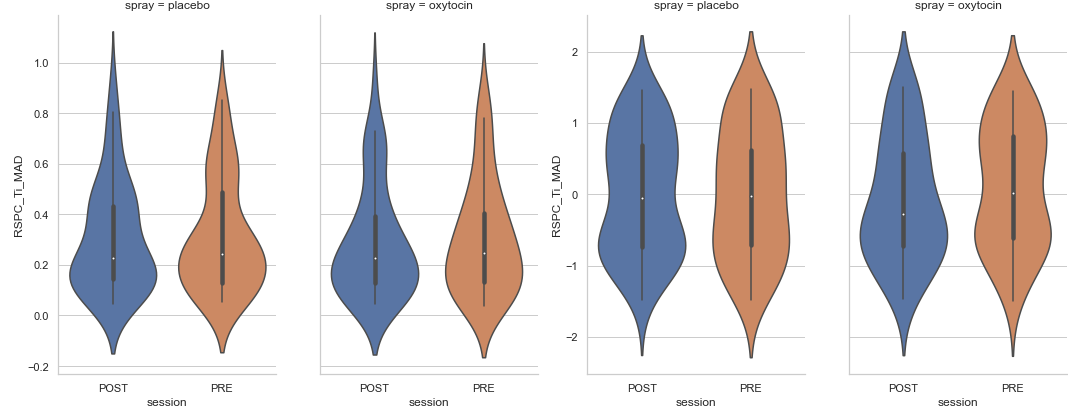

In [4]:
# Ti_MAD
# make individual subplots
p1 = sns.catplot(x='session',y='RSPC_Ti_MAD',col='spray',data=df_raw,kind='violin',split='true',aspect=aspect_ratio)
p2 = sns.catplot(x='session',y='RSPC_Ti_MAD',col='spray',data=df_zsc,kind='violin',split='true',aspect=aspect_ratio)

# build overarching figure
fig = plt.figure(figsize=SIZE)
gs = gridspec.GridSpec(1, 2)
mg0 = sfg.SeabornFig2Grid(p1, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(p2, fig, gs[1])
gs.tight_layout(fig)

plt.savefig(root+r'\sns_violinplots\RSPC_Ti_MAD.png')

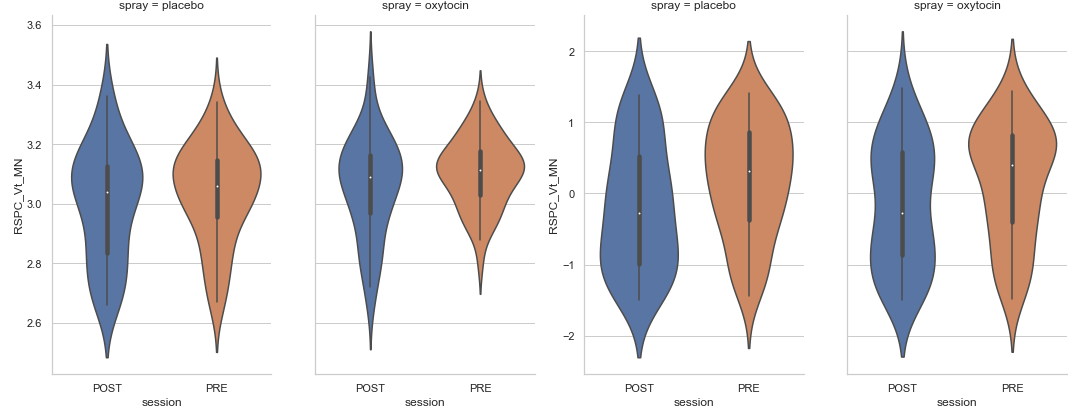

In [5]:
# Vt_MN
# make individual subplots
p1 = sns.catplot(x='session',y='RSPC_Vt_MN',col='spray',data=df_raw,kind='violin',split='true',aspect=aspect_ratio)
p2 = sns.catplot(x='session',y='RSPC_Vt_MN',col='spray',data=df_zsc,kind='violin',split='true',aspect=aspect_ratio)

# build overarching figure
fig = plt.figure(figsize=SIZE)
gs = gridspec.GridSpec(1, 2)
mg0 = sfg.SeabornFig2Grid(p1, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(p2, fig, gs[1])
gs.tight_layout(fig)

plt.savefig(root+r'\sns_violinplots\RSPC_Vt_MN.png')

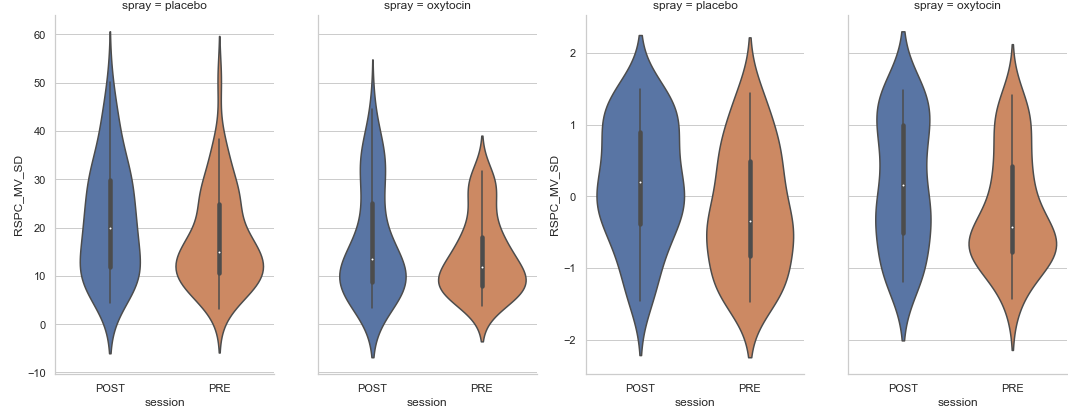

In [6]:
# MV_SD
# make individual subplots
p1 = sns.catplot(x='session',y='RSPC_MV_SD',col='spray',data=df_raw,kind='violin',split='true',aspect=aspect_ratio)
p2 = sns.catplot(x='session',y='RSPC_MV_SD',col='spray',data=df_zsc,kind='violin',split='true',aspect=aspect_ratio)

# build overarching figure
fig = plt.figure(figsize=SIZE)
gs = gridspec.GridSpec(1, 2)
mg0 = sfg.SeabornFig2Grid(p1, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(p2, fig, gs[1])
gs.tight_layout(fig)

plt.savefig(root+r'\sns_violinplots\RSPC_MV_SD.png')

#### Outdated figures (individual plots, can be useful for other reporting purposes)

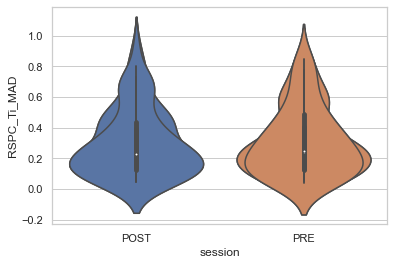

In [7]:
# Ti_MAD figure - OT, raw
df = df_raw[df_raw['spray']=='placebo']
violin = sns.violinplot(x=df['session'],y=df['RSPC_Ti_MAD'])
fig = violin.get_figure()
#fig.savefig(root+r'\sns_violinplots\Ti_MAD_OT_raw.png',dpi=500)

# Ti_MAD figure - PL, raw
df = df_raw[df_raw['spray']=='oxytocin']
violin = sns.violinplot(x=df['session'],y=df['RSPC_Ti_MAD'])
fig = violin.get_figure()
#fig.savefig(root+r'\sns_violinplots\Ti_MAD_PL_raw.png',dpi=500)

# Ti_MAD figure - OT, zscore
df = df_raw[df_raw['spray']=='placebo']
violin = sns.violinplot(x=df['session'],y=df['RSPC_Ti_MAD'])
fig = violin.get_figure()
#fig.savefig(root+r'\sns_violinplots\Ti_MAD_OT_zsc.png',dpi=500)

# Ti_MAD figure - PL, zscore
df = df_raw[df_raw['spray']=='oxytocin']
violin = sns.violinplot(x=df['session'],y=df['RSPC_Ti_MAD'])
fig = violin.get_figure()
#fig.savefig(root+r'\sns_violinplots\Ti_MAD_PL_zsc.png',dpi=500)